<a href="https://colab.research.google.com/github/cgarcia-99/Deep-Dive-Data-Science/blob/main/Transactions_by_Ciro_Garcia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transaction History by Ciro Garcia

## Problem Definition


 I want to predict whether or not a future customer will make a transaction based on their transaction data. This is a binary classification problem since we're looking to see if a customer will make a transaction or not. I will be using Naive Bayes classification

## Data Collection/Sources


### Data Overview

The data is available on AWS S3 at http://ddc-datascience.s3-website-us-west-1.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv

The data is anonymized. It is 180,000 rows by 53 columns.
There are 4 fields:


*   Unnamed
*   ID code


*   Target
*   49 variables


## Imports

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

## Data Cleaning


### File Paths

File paths for train and test data

In [ ]:
file_path = 'http://ddc-datascience.s3-website-us-west-1.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv'
train_path = file_path + 'Transaction.train.csv'
test_path = file_path + 'Transaction.test.csv'

### Load Data

Next up we'll load our data into a dataframe and look at the first few rows to make sure everything looks good!

In [ ]:
transac_orig = pd.read_csv(file_path)
transac_orig.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
transac_orig.shape

(180000, 53)

Success!

### Data Cleaning

In [ ]:
transac_orig.tail()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,179999,train_179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


looks good!

### Drop Columns

Unnamed and ID_code are just counting up, since both of these only count up it's not going to help our model. So we'll drop these

In [ ]:
#Before we drop columns, we'll have to make a copy of our original data and name it training
training = transac_orig.copy()
training.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
training.drop('Unnamed: 0', axis=1, inplace=True)
training.drop('ID_code', axis=1, inplace=True)

In [ ]:
training.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


‘Target’ column indicates a successful transaction (‘1’) or a no-transaction (‘0’) so we'll keep this column. All of the other 50 columns are our variables with the transaction data so we'll keep those columns too.

### Check for Null Values

Lets see if there are any null values

In [ ]:
training.isna()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
training.isna().sum()

target    0
var_0     0
var_1     0
var_2     0
var_3     0
var_4     0
var_5     0
var_6     0
var_7     0
var_8     0
var_9     0
var_10    0
var_11    0
var_12    0
var_13    0
var_14    0
var_15    0
var_16    0
var_17    0
var_18    0
var_19    0
var_20    0
var_21    0
var_22    0
var_23    0
var_24    0
var_25    0
var_26    0
var_27    0
var_28    0
var_29    0
var_30    0
var_31    0
var_32    0
var_33    0
var_34    0
var_35    0
var_36    0
var_37    0
var_38    0
var_39    0
var_40    0
var_41    0
var_42    0
var_43    0
var_44    0
var_45    0
var_46    0
var_47    0
var_48    0
var_49    0
dtype: int64

In [ ]:
training.isna().sum().sum()

0

In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   target  180000 non-null  int64  
 1   var_0   180000 non-null  float64
 2   var_1   180000 non-null  float64
 3   var_2   180000 non-null  float64
 4   var_3   180000 non-null  float64
 5   var_4   180000 non-null  float64
 6   var_5   180000 non-null  float64
 7   var_6   180000 non-null  float64
 8   var_7   180000 non-null  float64
 9   var_8   180000 non-null  float64
 10  var_9   180000 non-null  float64
 11  var_10  180000 non-null  float64
 12  var_11  180000 non-null  float64
 13  var_12  180000 non-null  float64
 14  var_13  180000 non-null  float64
 15  var_14  180000 non-null  float64
 16  var_15  180000 non-null  float64
 17  var_16  180000 non-null  float64
 18  var_17  180000 non-null  float64
 19  var_18  180000 non-null  float64
 20  var_19  180000 non-null  float64
 21  var_20  18

So there's no nulls, let's go to the next step

### Check for Target Values

Since 'target' is our target values, let's examine it to make sure everything is ok.

In [ ]:
training['target'].value_counts()

0    161960
1     18040
Name: target, dtype: int64

'0' indicates no transaction and the '1' indicates a successful transaction. We have 161,960 no transactions and 18,040 successful transactions. This is not even close to being even, so it makes it a biased dataset.

## Exploratory Data Analysis


# Feature Correlations

Let's take a look at what our feature correlations are

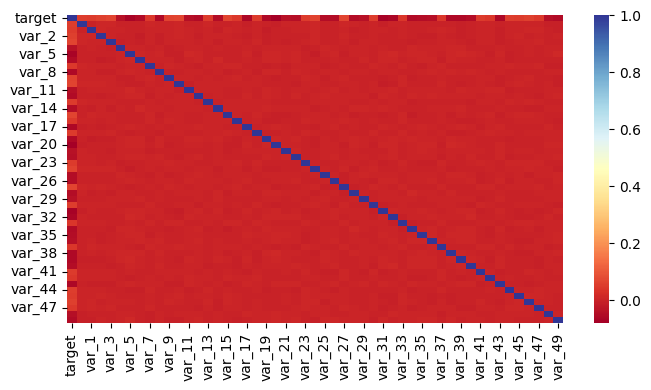

In [ ]:
corr = training.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap='RdYlBu',annot = False );

Just a quick glance, most of the heatmap is red but most of our target values were no transactions so that might have something to do with it.
Because we have such a large dataset, a pair plot might not be ideal in this case.

In [ ]:
#checking for correlation
corr = training.corr().abs()
corr = corr.melt(
    ignore_index = False,
    var_name = 'feature',
    value_name = 'correlation',
    )
corr = corr[corr['correlation'] != 1]
corr.sort_values(
    'correlation',
    inplace=True,
    ascending=False,
    )
corr[::2].head(5)

,feature,correlation
var_20,target,0.080689
target,var_31,0.073296
var_5,target,0.070015
target,var_3,0.066924
target,var_27,0.064868


We can see that target has a high correlation with only a few of our variables. This makes sense since a minority of the transactions were successful ones and the overwhelming majority were not.

### Overall Transaction Rate

In [ ]:
training['target'].value_counts()

0    161960
1     18040
Name: target, dtype: int64

In [ ]:
sum(training['target'])*100/len(training['target'])

10.022222222222222

Overall, 161,960 no-transactions and 18,040 successful transactions. This is about 10% successful transaction rates. Now because Gaussian Naive Bayes assumes the predictors are normally distributed, we're going to have to do something about it

First, let's make a new dataframe that only contains the successful transactions

## Data Processing


##New Dataframes

In [ ]:
#Remember to make a copy of your dataframe NOT a slice
success = training.copy()
success

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,22.3368,11.4176,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,16.0279,15.7685,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,15.2717,7.7995,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,20.4504,29.9869,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


In [ ]:
successful_transactions = success[success['target'] == 1]
successful_transactions

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
13,1,16.3699,1.5934,16.7395,4.8222,8.6978,13.7999,2.7925,14.3984,19.4258,...,5.6656,3.5750,-2.2723,15.7383,8.5618,11.8982,7.4002,7.4031,4.3989,15.6064
29,1,5.3301,-2.6064,13.1913,5.9064,9.1168,14.0957,12.3335,1.6610,13.0446,...,5.4183,8.6643,4.1428,4.7056,4.3694,16.4554,5.9215,7.9676,2.3405,17.4105
63,1,7.7072,0.0183,9.9974,6.0425,6.6710,14.0503,9.0144,-2.3445,23.5101,...,6.0669,2.5841,2.2445,23.1283,2.9384,27.6213,1.5832,5.0039,3.8814,15.7685
65,1,10.5358,-2.5439,8.7394,5.1584,9.0358,13.6021,4.2864,13.8723,2.2106,...,6.1149,2.2550,-7.2104,19.7545,6.3190,11.9410,4.6648,6.4227,3.4025,15.1340
71,1,6.7547,2.5973,14.2141,4.2336,9.1282,13.9394,3.6480,24.2658,33.3687,...,5.0565,11.9429,0.3140,20.4828,7.9488,11.2587,1.4677,3.5935,2.0013,18.9013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179949,1,8.0020,-0.6347,10.4115,6.6628,7.4319,14.1266,3.2978,23.4884,18.9512,...,5.0568,1.4224,-6.1050,32.4652,6.0889,16.3210,7.9024,10.2831,2.3823,13.7123
179956,1,12.8143,1.7022,12.5143,5.1252,5.9459,14.0384,1.9840,16.6534,21.4191,...,5.5592,6.6583,-3.3179,18.3914,5.4363,12.9044,1.3307,9.1192,0.8223,16.8015
179964,1,10.7885,-2.7318,9.9486,5.4815,5.8853,13.6646,0.6277,12.3875,-0.1087,...,5.0744,0.9305,4.2118,10.3895,6.5844,33.9682,0.9674,8.2839,1.4019,15.1976
179968,1,7.1795,-1.8935,13.6706,4.5245,5.2765,13.9576,8.4353,26.0088,25.4347,...,4.9769,-6.4637,1.2472,27.3877,2.7317,-7.4564,2.5978,9.9902,0.9539,17.1436


Looks good! Now lets make ANOTHER dataframe that only contains unsuccessful transactions!

In [ ]:
unsuccessful = training.copy()
unsuccessful

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,22.3368,11.4176,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,16.0279,15.7685,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,15.2717,7.7995,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,20.4504,29.9869,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


In [ ]:
unsuccessful_transactions = unsuccessful[unsuccessful['target'] == 0]
unsuccessful_transactions

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,22.3368,11.4176,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,16.0279,15.7685,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,15.2717,7.7995,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,20.4504,29.9869,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


Success!

I will make 2 additional new dataframes to help with our model

In [ ]:
#Remember to make a copy of your dataframe NOT a slice
predictors = training.copy()
predictors

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,22.3368,11.4176,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,16.0279,15.7685,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,15.2717,7.7995,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,20.4504,29.9869,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


In [ ]:
predictors.drop('target',axis=1,inplace=True)

In [ ]:
predictors

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,2.5791,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,8.5524,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,1.2145,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,6.8202,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,10.1102,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,22.3368,11.4176,3.6973,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,16.0279,15.7685,3.2069,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,15.2717,7.7995,3.3400,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,20.4504,29.9869,3.7526,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


Target has been dropped, this df is good to go :)

Now we want a dataframe that only contains the 'target' values

In [ ]:
target_value = transac_orig.copy()
target_value

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


In [ ]:
columns_to_drop = ['var_' + str(i) for i in range(50)]

In [ ]:
target_value.drop(columns=columns_to_drop, inplace=True)

In [ ]:
target_value

,Unnamed: 0,ID_code,target
0,0,train_0,0
1,1,train_1,0
2,2,train_2,0
3,3,train_3,0
4,4,train_4,0
...,...,...,...
179995,179995,train_179995,0
179996,179996,train_179996,0
179997,179997,train_179997,0
179998,179998,train_179998,0


In [ ]:
target_value.drop('Unnamed: 0', axis=1, inplace=True)
target_value.drop('ID_code', axis=1, inplace=True)

In [ ]:
target_value

,target
0,0
1,0
2,0
3,0
4,0
...,...
179995,0
179996,0
179997,0
179998,0


Awesome :), now let's test it using our Gaussian Naive Bayes model!

### Gaussian Naive Bayes Model

In [ ]:
gnb = GaussianNB()

Next we'll separate our features and targets

In [ ]:
y = target_value['target'].copy()
X = predictors

Next, we'll train the model and see how it does

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 36000 points : 3283


Let's take a closer look

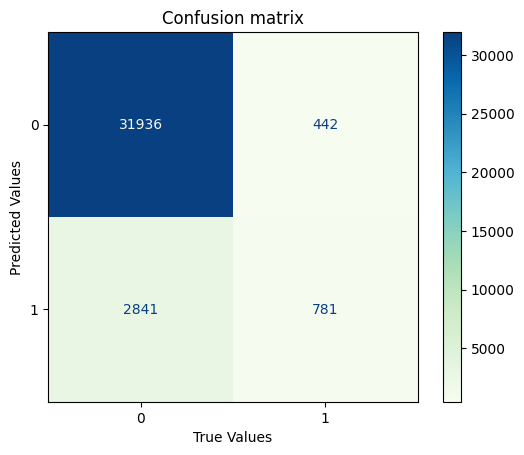

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap='GnBu',
)
plt.grid(False)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title('Confusion matrix') ;
# plt.savefig('confusion_matrix.png')

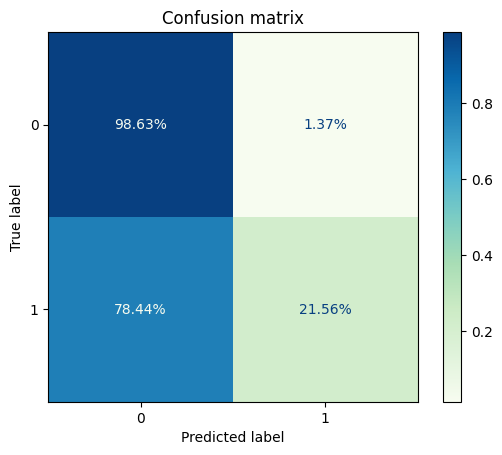

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

### Cross Validation

Next, we'll perform cross validation to see what our accuracy was. Here's the function.

In [ ]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [ ]:
accuracy_scores = cross_validate(X, y, 100)
print(round(accuracy_scores.mean(), 5))

0.91126


91% accuracy? That's very high but like I said before the data is skewed towards no transactions being made

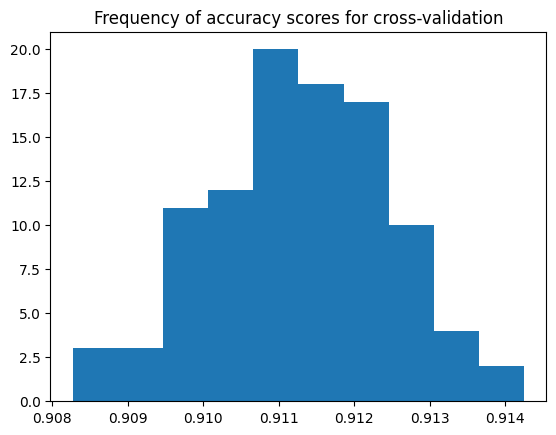

In [ ]:
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation')
plt.show()

The distribution is a little symmetric but not quite. It's a bit uneven.

Since the training data is very skewed towards non-successful transactions (about 90% of the training data has ‘target’==0) let's see what happens if the data was a little more even. We'll use the new dataframes we created above.

In [ ]:
successful_transactions_equal = successful_transactions.sample(n=18040, random_state=42)

In [ ]:
unsuccessful_transactions_equal = unsuccessful_transactions.sample(n=18040, random_state=42)

In [ ]:
balanced_data = pd.concat([successful_transactions_equal, unsuccessful_transactions_equal], ignore_index=True)

In [ ]:
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
balanced_data

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,1,10.8937,-2.3232,14.3532,5.3950,7.3042,13.6779,14.8995,-2.0375,19.6474,...,5.7201,4.6024,5.5861,8.7570,5.3642,2.5513,2.1707,6.6442,3.3246,13.5074
1,0,10.9306,-3.3376,10.4269,6.5104,7.8230,13.9952,11.9494,17.3123,24.8857,...,5.5044,1.7825,2.3005,6.3963,2.0110,20.8003,-1.0479,4.0930,2.3524,11.2835
2,0,14.8030,-5.5184,16.7007,5.0217,6.0914,13.8630,14.3000,12.9024,14.3544,...,5.3838,-5.9654,0.0612,14.2972,7.4498,23.1715,-1.9564,14.6437,2.8544,15.1764
3,0,9.0741,-0.1808,10.3227,5.0510,9.0830,14.0166,9.2472,14.2912,25.4212,...,5.4016,0.0560,-4.7391,24.8200,2.1690,8.1017,11.4235,10.7636,4.2905,14.9446
4,1,12.5012,1.1886,11.7406,3.4211,6.1652,14.0348,2.1593,18.3967,5.7738,...,5.3546,-4.3123,-8.0247,15.0880,4.0899,15.5734,-4.9105,7.9972,2.2861,13.6913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36075,1,9.1676,4.8066,16.7546,6.5156,7.4633,14.0897,8.3349,10.3172,4.3490,...,5.6697,6.4783,1.7126,20.4148,7.1970,26.9343,2.2666,10.1884,1.3254,12.0793
36076,1,13.6061,-0.6387,12.4815,6.0126,8.9828,13.8536,12.4670,15.6701,-1.8989,...,5.5798,-1.5829,-7.8771,11.9572,4.8338,20.9117,0.3450,13.2354,2.2576,17.1832
36077,1,7.5018,-3.3326,12.3326,3.9805,9.2881,13.7459,8.1903,9.6102,24.2989,...,6.1164,-5.5164,3.2150,21.4198,2.1484,12.6586,4.8972,3.5861,0.6643,18.1294
36078,1,12.8413,-7.5475,11.1999,5.7010,7.0224,13.8108,8.7470,18.4091,8.1870,...,5.7359,6.6680,-13.6067,5.0434,1.0401,22.5207,-1.0528,9.3196,-0.7056,8.9577


In [ ]:
y = balanced_data['target'].copy()
X = balanced_data.drop('target', axis=1, inplace=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 7216 points : 1760


Lets take a closer look

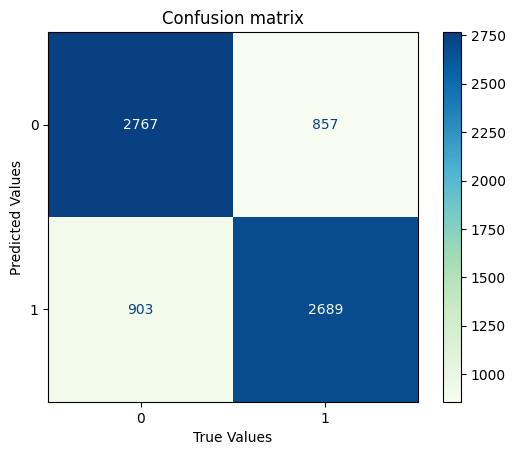

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap='GnBu',
)
plt.grid(False)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title('Confusion matrix') ;
# plt.savefig('confusion_matrix.png')

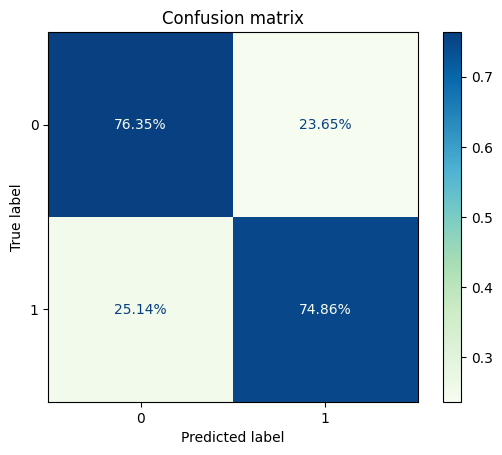

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

An overall more balanced dataset

## Second Cross Validation

Lets take a look at how our new model performs

In [ ]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [ ]:
accuracy_scores = cross_validate(X, y, 100)
print(round(accuracy_scores.mean(), 5))

0.75759


76% accuracy for a 50/50 case? We went a little lower now! This is probably because our model runs better when there are no transactions being made since the data is so skewed.

## Data Visualization

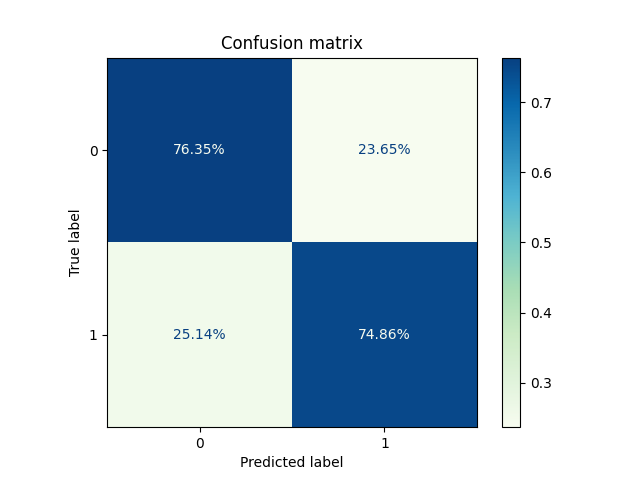

In [ ]:
Image('confusion_matrix.png')

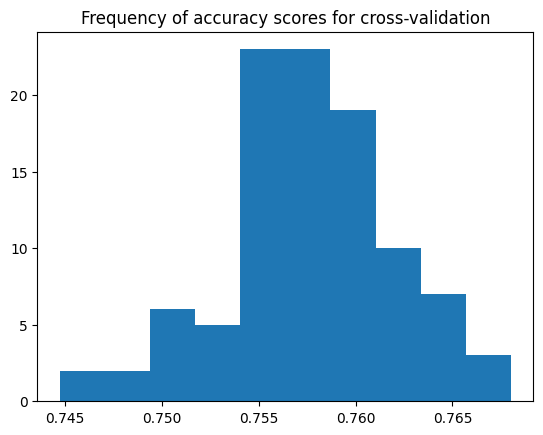

In [ ]:
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation')
plt.show()

We can see that our plot is a bit more skewed than it was. This shows us that our model works better at predicting no transactions since our data was so biased.

## Conclusion

###Important features

We saw that var_20 and var_31 were highly correlated to our target of 1.

### Model performance

- Using Naive Bayes resulted in an average accuracy of 91%  and 76% in our cross-validation tests.
- Our model did better at predicting when passengers did not make a transaction than when they did due to there being far greater number of no transactions.

So in conclusion a future customer is not very likely to make a future transaction based on their transaction data